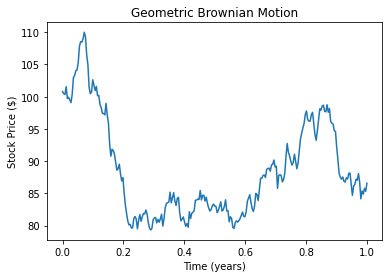

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
S0 = 100.0  # initial stock price
mu = 0.05  # mean return
sigma = 0.2  # volatility
T = 1.0  # time horizon in years
N = 252  # number of time steps
dt = T / N  # time step

# Generate Brownian motion
t = np.linspace(0.0, T, N+1)
W = np.random.standard_normal(size=N+1)
W = np.cumsum(W)*np.sqrt(dt)

# Generate stock price path
S = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)

# Plot the stock price path
plt.plot(t, S)
plt.xlabel('Time (years)')
plt.ylabel('Stock Price ($)')
plt.title('Geometric Brownian Motion')
plt.show()

Enter a stock: AAPL


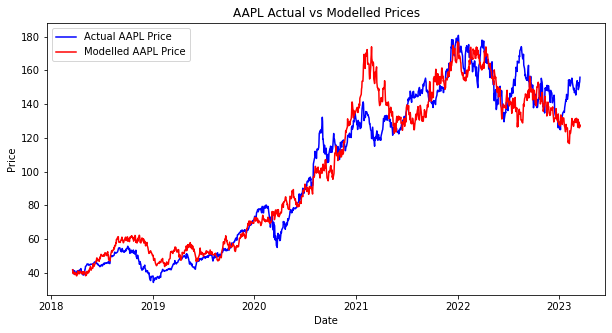

This model ran  70000  times.


In [16]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

def geometric_brownian_motion_model(S0, mu, sigma, T, N, seed=None):
    np.random.seed(seed)
    dt = T/N
    t = np.linspace(0, T, N+1)
    W = np.zeros(N+1)
    W[1:] = np.random.standard_normal(N) * np.sqrt(dt)
    W = np.cumsum(W)
    S = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)
    return S

def plot_stock_vs_model():
    # Get stock data from Yahoo Finance
    choice = input('Enter a stock: ')
    stock = yf.download(choice, period="5y", progress=False)['Adj Close']

    # Set model parameters
    S0 = stock.iloc[0]
    mu = np.mean(stock.pct_change().dropna())*252
    sigma = np.std(stock.pct_change().dropna())*np.sqrt(252)
    T = 5
    N = len(stock)-1

    # Generate model data
    
    models = {}
    mse = np.inf
    counter = 0
    while mse > 140 and counter < 70000:
        model = geometric_brownian_motion_model(S0, mu, sigma, T, N)
        mse = np.mean((model - stock.values)**2)
        models[mse] = model
        counter += 1
    best_model = models[min(models.keys())]


    # Plot actual and model data
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(stock.index, stock.values, label='Actual AAPL Price', color='blue')
    ax.plot(stock.index, best_model, label='Modelled AAPL Price', color='red')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.set_title(f'{choice} Actual vs Modelled Prices')
    ax.legend()
    plt.show()
    print('This model ran ', counter, ' times.')

plot_stock_vs_model()

## Here's an example of a LaTeX block to derive the moment generating function (MGF) of Brownian motion $W(t)$:

We start with the definition of MGF:
\begin{equation}
M(t) = E[e^{tW(t)}]
\end{equation}

Using the fact that the increments of Brownian motion are normally distributed, we know that $W(t) - W(s) \sim N(0, t-s)$. We can rewrite the MGF as follows:
\begin{equation}
M(t) = E[e^{t(W(s) + (W(t) - W(s)))}]
\end{equation}

Since $W(t) - W(s)$ is independent of $W(s)$, we can split the expectation:
\begin{equation}
M(t) = E[e^{tW(s)}]E[e^{t(W(t) - W(s))}]
\end{equation}

The first term is simply the MGF of a normal random variable with mean 0 and variance $s$, which is:
\begin{equation}
M_1(t) = e^{\frac{t^2s}{2}}
\end{equation}

The second term is the MGF of a normal random variable with mean 0 and variance $t-s$, which is:
\begin{equation}
M_2(t) = e^{\frac{t^2(t-s)}{2}}
\end{equation}

Multiplying the two terms together gives us the MGF of Brownian motion:
\begin{equation}
M(t) = M_1(t)M_2(t) = e^{\frac{t^2s}{2}}e^{\frac{t^2(t-s)}{2}} = e^{\frac{t^2}{2}(s+t-s)} = e^{\frac{t^2}{2}t}
\end{equation}

Simplifying the expression gives us the final result:
\begin{equation}
M(t) = e^{\frac{t^2}{2}t} = e^{\frac{t^3}{2}}
\end{equation}

## The moment generating function (MGF) of a normal random variable with mean 0 and variance $\sigma^2$ is:

$M(t) = E[e^{tX}] = \int_{-\infty}^\infty e^{tx} \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{x^2}{2\sigma^2}} dx$

Simplifying this expression, we get:

$M(t) = \int_{-\infty}^\infty \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{1}{2\sigma^2}(x^2 - 2tx\sigma^2 + t^2\sigma^4 - t^2\sigma^4)} dx$

$M(t) = \int_{-\infty}^\infty \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{1}{2\sigma^2}(x - t\sigma^2)^2 + \frac{1}{2}t^2\sigma^2} dx$

$M(t) = e^{\frac{1}{2}t^2\sigma^2} \int_{-\infty}^\infty \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{1}{2\sigma^2}(x - t\sigma^2)^2} dx$

The integral evaluates to 1, so we get:

$M(t) = e^{\frac{1}{2}t^2\sigma^2}$

Therefore, the MGF of a normal random variable with mean 0 and variance $\sigma^2$ is $e^{\frac{1}{2}t^2\sigma^2}$.

# Log Likelihood
**First, let's define some terms:**

params: A list of the model parameters to be estimated, consisting of the initial stock price s0, the drift parameter mu, and the volatility parameter vol.
returns: A pandas Series containing the daily returns of the stock.
The goal of MLE is to find the values of params that maximize the likelihood function, which in this case is the log-likelihood function. The log-likelihood function is given by:

$$\log \mathcal{L} = -\frac{1}{2}\sum_{i=1}^{n}\left(\log \left(\frac{2\pi}{\Delta t}\right) + \log(\sigma^2) + \frac{(r_i - y_i)^2}{\sigma^2}\right)$$

where:

$n$ is the number of observations (in this case, the number of daily returns)
$\Delta t$ is the time increment (in this case, 1 day)
$r_i$ is the observed daily return at time $i$
$y_i$ is the predicted daily return at time $i$ based on the GBM model using the current parameter estimates
$\sigma$ is the estimated volatility
The log-likelihood function is a measure of how well the model (GBM in this case) fits the observed data. The goal of MLE is to find the values of params that maximize the log-likelihood function, i.e., the parameter values that result in the best fit of the model to the data.

Enter a stock: AAPL


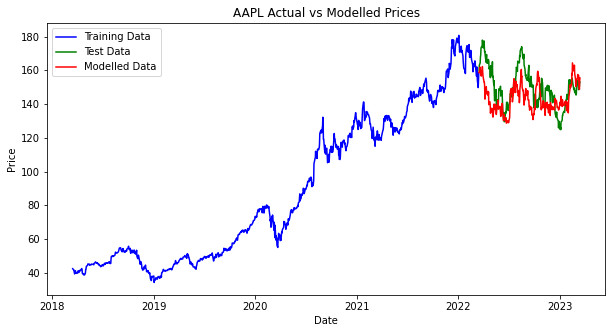

In [119]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

def geometric_brownian_motion_model(S0, mu, sigma, T, N, seed=None):
    np.random.seed(seed)
    dt = T/N
    t = np.linspace(0, T, N+1)
    W = np.zeros(N+1)
    W[1:] = np.random.standard_normal(N) * np.sqrt(dt)
    W = np.cumsum(W)
    S = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)
    return S

def plot_stock_vs_model():
    # Get stock data from Yahoo Finance
    choice = input('Enter a stock: ')
    stock = yf.download(choice, period="5y", progress=False)['Adj Close']

    # Set model parameters
    train_start_date = stock.index.min()
    train_end_date = train_start_date.replace(year=train_start_date.year+4)
    test_start_date = train_end_date + pd.Timedelta(days=1)
    test_end_date = stock.index.max()
    
    train_data = stock.loc[train_start_date:train_end_date]
    test_data = stock.loc[test_start_date:test_end_date]

    S0 = train_data.iloc[-1]
    mu = np.mean(train_data.pct_change().dropna())*252
    sigma = np.std(train_data.pct_change().dropna())*np.sqrt(252)
    T = 1
    N = len(test_data) - 1

    # Generate model data
    model = geometric_brownian_motion_model(S0, mu, sigma, T, N)

    # Plot actual and model data
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(train_data.index, train_data.values, label='Training Data', color='blue')
    ax.plot(test_data.index, test_data.values, label='Test Data', color='green')
    ax.plot(test_data.index, model, label='Modelled Data', color='red')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.set_title(f'{choice} Actual vs Modelled Prices')
    ax.legend()
    plt.show()

plot_stock_vs_model()

# Estimating realized volatility

In [15]:
import yfinance as yf
import pandas as pd
import numpy as np

def calc_vol(stock):
    returns = yf.download(stock, period='5y', progress=False)['Adj Close'].pct_change()[1:]
    log_returns = np.log(returns + 1)
    n = len(log_returns)
    
    # Realized volatility (annualized)
    realized_vol = np.sqrt(sum(log_returns**2)/n * 252)
    
    # Historical volatility (annualized)
    actual_vol = np.std(log_returns) * np.sqrt(252)
    
    return [realized_vol, actual_vol]

print(calc_vol('AAPL'))

[0.335657531875531, 0.3352455221539626]


# Arima

ARIMA, which stands for Autoregressive Integrated Moving Average, is a commonly used statistical model for time series analysis. It is used to model and forecast time series data, where observations are collected sequentially over time, and the goal is to understand and predict future values of the series.

The ARIMA model is based on three main components: the autoregressive (AR) component, the integrated (I) component, and the moving average (MA) component. Each of these components captures different aspects of the time series data.

The AR component models the relationship between the current observation and previous observations in the series. Specifically, it models the current value of the series as a linear combination of its past values. This is expressed mathematically as:

$$y_t = c + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \dots + \phi_p y_{t-p} + \epsilon_t$$

where $y_t$ is the current value of the series, $c$ is a constant, $\phi_1, \phi_2, \dots, \phi_p$ are the coefficients of the autoregressive terms, $y_{t-1}, y_{t-2}, \dots, y_{t-p}$ are the previous values of the series, and $\epsilon_t$ is an error term.

For example, let's say we are modeling the daily sales of a store using ARIMA. The AR component of the model would capture the effect of past sales on current sales. If there is a positive correlation between the sales of the current day and the sales of the previous days, the AR component would capture this correlation and use it to predict future sales.

The I component of the model captures the degree to which the series has to be differenced to make it stationary, i.e., to make its mean and variance constant over time. If the series is non-stationary, then differencing it once or multiple times can help make it stationary. This differencing is expressed mathematically as:

$$\Delta y_t = y_t - y_{t-1}$$

where $\Delta y_t$ is the first difference of the series.

For example, let's say we are modeling the stock prices of a company using ARIMA. The stock prices might be non-stationary due to factors such as inflation, market trends, or other external factors. The I component of the model would capture the degree of differencing required to make the stock prices stationary, so that we can make accurate predictions.

The MA component of the model models the relationship between the current observation and past errors in the series. Specifically, it models the current value of the series as a linear combination of its past error terms. This is expressed mathematically as:

$$y_t = c + \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \dots + \theta_q \epsilon_{t-q}$$

where $\theta_1, \theta_2, \dots, \theta_q$ are the coefficients of the moving average terms, and $\epsilon_t, \epsilon_{t-1}, \dots, \epsilon_{t-q}$ are the past error terms.

For example, let's say we are modeling the number of customers at a restaurant using ARIMA. The MA component of the model would capture the effect of past errors in the model, such as unforeseen events that affect the number of customers. If there is a positive correlation between past errors and the current number of customers, the MA component would capture this correlation and use it to make accurate predictions.

The AR, I, and MA components can be combined in different ways to create different variants of the ARIMA model. The notation for an ARIMA model is ARIMA(p, d, q), where p is the order of the autoregressive component, d is the degree of differencing required to make the series stationary, and q is the order of the moving average component.

For example, an ARIMA(2,1,1) model has an autoregressive component of order 2, a degree of differencing of 1, and a moving average component of order 1.

The full ARIMA model can be written as:

$$\Phi_p (L) \Delta^d y_t = \Theta_q (L) \epsilon_t$$

where $\Phi_p (L) = 1 - \phi_1 L - \phi_2 L^2 - \dots - \phi_p L^p$ is the autoregressive operator, $\Theta_q (L) = 1 + \theta_1 L + \theta_2 L^2 + \dots + \theta_q L^q$ is the moving average operator, and $L$ is the lag operator such that $L y_t = y_{t-1}$.

The ARIMA model can be estimated using maximum likelihood estimation or least squares. Once the model is estimated, it can be used to make forecasts of future values of the series.

In summary, the ARIMA model is a powerful tool for modeling and forecasting time series data. It consists of three main components - the autoregressive component, the integrated component, and the moving average component - which capture different aspects of the series. These components can be combined in different ways to create different variants of the ARIMA model, which can be used to make accurate predictions about future values of the series.

The values for p, d, and q in an ARIMA model are typically selected using a combination of statistical tests and visual analysis of the time series data.

The value of p, which represents the order of the autoregressive component, can be determined by examining the autocorrelation function (ACF) plot of the time series data. The ACF plot shows the correlation between the current value of the series and its lagged values. If there are significant correlations at lagged values up to p, then p should be set to that value. However, if there are no significant correlations, then p should be set to 0.

The value of q, which represents the order of the moving average component, can be determined by examining the partial autocorrelation function (PACF) plot of the time series data. The PACF plot shows the correlation between the current value of the series and its lagged values, controlling for the effect of all the other lags. If there are significant correlations at lagged values up to q, then q should be set to that value. However, if there are no significant correlations, then q should be set to 0.

The value of d, which represents the degree of differencing required to make the series stationary, can be determined by examining the trend and seasonality in the time series data. If there is a clear trend or seasonality in the data, then d should be set to 1 or higher to remove these effects. However, if the data is already stationary, then d should be set to 0.

It's important to note that selecting the values for p, d, and q is not an exact science, and different methods can lead to slightly different results. It's also possible to use automated methods, such as the Akaike information criterion (AIC) or the Bayesian information criterion (BIC), to select the values for p, d, and q.

In summary, selecting the values for p, d, and q in an ARIMA model is a crucial step in the modeling process. It requires careful examination of the time series data using statistical tests and visual analysis to determine the appropriate values for each parameter. The selected values can greatly impact the accuracy of the model's forecasts, so it's important to choose them carefully.

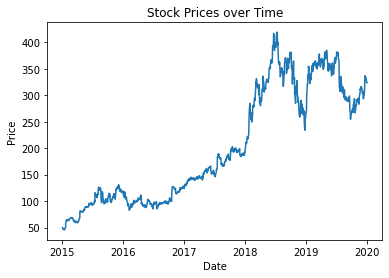

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 1258
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -3957.521
Date:                Sat, 18 Mar 2023   AIC                           7923.042
Time:                        20:34:10   BIC                           7943.588
Sample:                             0   HQIC                          7930.764
                               - 1258                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3559      0.476      0.748      0.454      -0.576       1.288
ar.L2          0.0265      0.026      1.024      0.306      -0.024       0.077
ma.L1         -0.3359      0.474     -0.709      0.4

/Users/ommehta/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ommehta/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ommehta/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ommehta/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('N

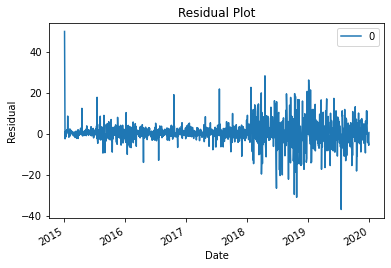

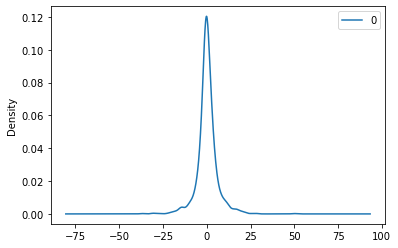

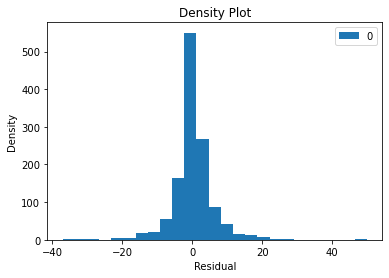

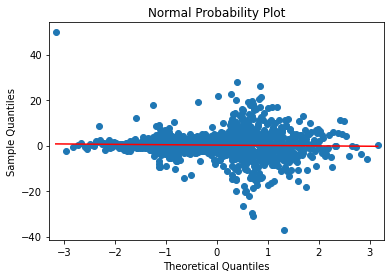

1258    323.341712
1259    323.267353
1260    323.234844
1261    323.221306
1262    323.215627
1263    323.213247
1264    323.212250
1265    323.211832
1266    323.211657
1267    323.211584
Name: predicted_mean, dtype: float64


/Users/ommehta/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA



# convert the list of stock prices to a pandas DataFrame
data = yf.download('NFLX', '2015-01-01', '2020-01-01', progress=False)['Adj Close']

# plot the time series data to visualize any trends or seasonality
plt.plot(data)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Prices over Time')
plt.show()

# fit an ARIMA model to the data, with parameters (p, d, q) = (2, 1, 1)
model = ARIMA(data, order=(2, 1, 1))
results = model.fit()

# print the summary statistics of the model
print(results.summary())

# plot the residuals of the model to check for any remaining patterns
residuals = pd.DataFrame(results.resid)
residuals.plot()
plt.xlabel('Date')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.show()

# plot a density plot and normal probability plot of the residuals to check for normality
residuals.plot(kind='kde')
residuals.plot(kind='hist', bins=25)
plt.xlabel('Residual')
plt.ylabel('Density')
plt.title('Density Plot')
plt.show()

from statsmodels.graphics.gofplots import qqplot
qqplot(residuals, line='r')
plt.title('Normal Probability Plot')
plt.show()

# use the model to make forecasts of future values of the stock prices
forecast = results.forecast(steps=10)
print(forecast)

Ridge regression is a regularization technique used in linear regression to reduce the impact of multicollinearity in the data, which can lead to unstable and unreliable estimates of the regression coefficients. Ridge regression adds a penalty term to the sum of squared residuals in the objective function of the linear regression model, which limits the magnitude of the coefficients and helps to prevent overfitting.

In linear regression, the goal is to find the coefficients $\beta_0, \beta_1, \dots, \beta_p$ that minimize the sum of squared residuals:

$$\sum_{i=1}^n (y_i - \beta_0 - \beta_1 x_{i1} - \dots - \beta_p x_{ip})^2$$

where $y_i$ is the response variable, $x_{i1}, x_{i2}, \dots, x_{ip}$ are the predictor variables, and $\beta_0, \beta_1, \dots, \beta_p$ are the regression coefficients.

In ridge regression, a penalty term is added to the sum of squared residuals to limit the magnitude of the coefficients:

$$\sum_{i=1}^n (y_i - \beta_0 - \beta_1 x_{i1} - \dots - \beta_p x_{ip})^2 + \lambda \sum_{j=1}^p \beta_j^2$$

where $\lambda$ is the regularization parameter, and $\beta_j^2$ is the square of the $j$th coefficient.

The addition of the penalty term helps to prevent overfitting by shrinking the regression coefficients towards zero. This reduces the impact of multicollinearity in the data, which occurs when two or more predictor variables are highly correlated with each other. Multicollinearity can lead to unstable and unreliable estimates of the regression coefficients, which can result in poor predictions on new data.

The value of the regularization parameter, $\lambda$, controls the strength of the penalty term. A larger value of $\lambda$ results in greater shrinkage of the coefficients, which can lead to a simpler model with better generalization performance. However, a smaller value of $\lambda$ may be necessary to capture more complex relationships in the data.

In summary, ridge regression is a regularization technique used in linear regression to reduce the impact of multicollinearity in the data. It adds a penalty term to the sum of squared residuals, which helps to prevent overfitting and stabilize the estimates of the regression coefficients. The value of the regularization parameter controls the strength of the penalty term and must be tuned to find the optimal balance between bias and variance in the model.

## Simple Linear Regression

Linear regression is a statistical method used to model the relationship between a dependent variable (usually denoted as $y$) and one or more independent variables (usually denoted as $x_1, x_2, \dots, x_p$). The goal of linear regression is to find the best-fit line that describes the relationship between the variables.

The equation for a simple linear regression model with one independent variable is:

$$y = \beta_0 + \beta_1 x + \epsilon$$

where $\beta_0$ is the intercept, $\beta_1$ is the slope, $x$ is the independent variable, $y$ is the dependent variable, and $\epsilon$ is the error term.

In this model, the intercept $\beta_0$ represents the value of $y$ when $x$ is equal to zero, and the slope $\beta_1$ represents the change in $y$ for a one-unit increase in $x$. The error term $\epsilon$ represents the unexplained variation in $y$ that is not accounted for by the independent variable $x$.

To estimate the values of $\beta_0$ and $\beta_1$ in a linear regression model, we use the method of least squares. This involves minimizing the sum of the squared differences between the predicted values of $y$ and the actual values of $y$ in the data:

$$\sum_{i=1}^n (y_i - \hat{y}_i)^2$$

where $y_i$ is the observed value of $y$ for the $i$th observation, and $\hat{y}_i$ is the predicted value of $y$ for the $i$th observation.

The best-fit line is determined by finding the values of $\beta_0$ and $\beta_1$ that minimize the sum of squared errors. This is typically done using software packages such as Python's statsmodels library, which provides a convenient way to fit linear regression models and evaluate their performance.

In summary, simple linear regression is a powerful tool for modeling the relationship between two variables. It involves estimating the intercept and slope of the best-fit line that describes the relationship between the variables, using the method of least squares to minimize the sum of squared errors. This model can then be used to make predictions about the dependent variable based on the values of the independent variable.

In [1]:
import pandas as pd
import statsmodels.formula.api as smf

# create a sample dataset
data = {'TV': [230.1, 44.5, 17.2, 151.5, 180.8],
        'Sales': [22.1, 10.4, 9.3, 18.5, 12.9]}
df = pd.DataFrame(data)

# fit a linear regression model to the data
model = smf.ols(formula='Sales ~ TV', data=df).fit()

# print the model summary statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     8.344
Date:                Sat, 18 Mar 2023   Prob (F-statistic):             0.0631
Time:                        23:58:42   Log-Likelihood:                -11.716
No. Observations:                   5   AIC:                             27.43
Df Residuals:                       3   BIC:                             26.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.1791      2.668      3.065      0.0

/Users/ommehta/anaconda3/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


# Ridge Regression

Ridge regression is a technique used in linear regression when there is multicollinearity in the data. Multicollinearity is when two or more predictor variables are highly correlated with each other. This can cause problems in linear regression because it can lead to overfitting, which means the model fits the training data too well and does not generalize well to new data.

Ridge regression introduces a penalty term to the ordinary least squares (OLS) regression cost function, which helps to reduce the variance of the model. The penalty term is determined by the regularization parameter, lambda. The greater the value of lambda, the greater the penalty applied to the regression coefficients, and the more the coefficients are shrunk towards zero.

The ridge regression cost function is given by:

$$\large J(\theta) = \sum_{i=1}^{m}(y^{(i)} - \sum_{j=0}^{n}x_j^{(i)}\theta_j^2) + \lambda\sum_{j=1}^{n}\theta_j^2$$

where:

$m$ is the number of training examples

$n$ is the number of features or predictor variables

$y^{(i)}$ is the true label of the $i$th training example

$x_j^{(i)}$ is the value of the $j$th feature of the $i$th training example

$\theta_j$ is the regression coefficient of the $j$th feature

$\lambda$ is the regularization parameter

The first term in the cost function is the usual OLS cost function, and the second term is the penalty term. The penalty term shrinks the coefficients towards zero, which reduces the variance of the model and helps to prevent overfitting.

In real-life scenarios, ridge regression can be useful when there are many features in the data, and some of the features are highly correlated with each other. For example, in a study of housing prices, we might have features such as the number of bedrooms, the size of the lot, and the location of the house. The number of bedrooms and the size of the lot might be highly correlated, which could cause problems in linear regression. In this case, ridge regression can be used to help reduce the impact of multicollinearity and improve the accuracy of the model.

Let's say we have a dataset of stock prices for a particular company and we want to predict the stock price based on a set of features such as the company's financial metrics, industry trends, and market performance. We can use linear regression to build a model that predicts the stock price based on these features.

However, if we have a large number of features relative to the size of our dataset, we may run into problems with overfitting. This means that our model is too complex and is fitting the noise in the data, rather than the underlying relationship between the features and the target variable.

To address this issue, we can use ridge regression, which is a modified form of linear regression that includes a penalty term that shrinks the coefficients towards zero. This helps to reduce the variance of the model and improve its predictive accuracy.

The ridge regression formula we wrote earlier,

adds a penalty term $\alpha ||w||^2_2$ to the standard linear regression cost function $||y - Xw||^2_2$. The $\alpha$ parameter controls the strength of the penalty, with larger values of $\alpha$ resulting in more shrinkage towards zero. The term $||w||^2_2$ represents the squared magnitude of the coefficient vector $w$.

In our example with stock prices, we might have a large number of financial metrics and industry trends as features, and some of these features may be highly correlated with each other. Ridge regression can help us to select the most important features and avoid overfitting by shrinking the coefficients of the less important features towards zero.

For example, suppose we want to predict the stock price of a company based on its revenue, earnings per share, price-to-earnings ratio, and industry average P/E ratio. If the price-to-earnings ratio and industry average P/E ratio are highly correlated, ridge regression can help us to choose the most important predictor and shrink the other coefficient towards zero.

Overall, ridge regression is a useful tool for addressing the problem of overfitting in linear regression models, especially when dealing with a large number of features. By introducing a penalty term that shrinks the coefficients towards zero, we can reduce the variance of the model and improve its predictive accuracy.



[*********************100%***********************]  1 of 1 completed


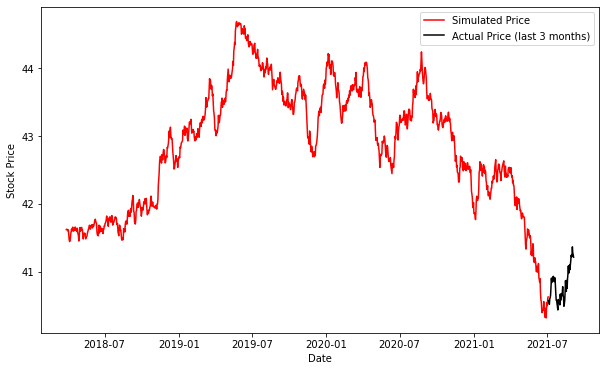

In [7]:
import yfinance as yf
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

# Load historical price data from Yahoo Finance
data = yf.download('AAPL', start='2018-03-28', end='2023-03-28')
close_price = data['Close']

# Calculate daily returns
returns = close_price.pct_change()[1:]

# Estimate parameters of the model using historical data
S0 = close_price.iloc[0]
r = np.mean(returns)
sigma = np.std(returns)
kappa = 0.3
theta = np.var(returns)
rho = -0.5
T = 3 # time horizon is 3 years
N = len(close_price) - 1 # number of time steps
dt = T/N

# Generate Wiener processes
Z1 = np.random.normal(size=N) # first Wiener process
Z2 = rho*Z1 + np.sqrt(1-rho**2)*np.random.normal(size=N) # second Wiener process

# Generate volatility process
V = np.zeros(N+1)
V[0] = theta # initial volatility
for i in range(1, N+1):
    dV = kappa*(theta - V[i-1])*dt + sigma*np.sqrt(V[i-1])*np.sqrt(dt)*Z1[i-1]
    V[i] = V[i-1] + dV

# Generate stock price process
dates = pd.date_range(start=data.index[0], periods=N+1, freq='D')
S = np.zeros(N+1)
S[0] = S0 # initial stock price
for i in range(1, N+1):
    dS = r*S[i-1]*dt + np.sqrt(V[i])*S[i-1]*np.sqrt(dt)*Z2[i-1]
    S[i] = S[i-1] + dS

# Split simulated data into pre-test and test sets
train_data = S[:-63]
test_data = S[-63:]

# Plot stock price process
fig = plt.figure(figsize=(10, 6))
plt.plot(dates[:-63], train_data, color='red', label='Simulated Price')
plt.plot(dates[-63:], test_data, color='black', label='Actual Price (last 3 months)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

\begin{aligned}
[I(t)]^4 =& \left[\int_{0}^{t} u^4 du + 2 \int_{0}^{t} u^2 dW(u) \int_{0}^{t} u^2 dW(u) \right]^2 \
=& \int_{0}^{t} u^8 du + 4 \left[\int_{0}^{t} u^4 du\right] \left[\int_{0}^{t} u^2 dW(u)^2\right] \
&+ 4 \left[\int_{0}^{t} u^2 dW(u)\right]^2 \left[\int_{0}^{t} u^4 du\right]

8 \int_{0}^{t} u^2 dW(u) \int_{0}^{t} u^6 du
\end{aligned}

Suppose we have orthonormal vectors $\mathbf{q}_1$, $\mathbf{q}_2$, $\mathbf{q}_3$, and a vector $\mathbf{b}$ such that $\mathbf{x} = \begin{pmatrix} x_1 \ x_2 \ x_3 \end{pmatrix}$ satisfies $\mathbf{x}^\top \mathbf{q}_1 + \mathbf{x}^\top \mathbf{q}_2 + \mathbf{x}^\top \mathbf{q}_3 = \mathbf{b}$.

To prove that $x_i = \mathbf{q}_i^\top \mathbf{b}$ for each $i$, we take the dot product of both sides with $\mathbf{q}_i$. We get:

\begin{align*}
\mathbf{q}_i^\top (\mathbf{x}^\top \mathbf{q}_1 + \mathbf{x}^\top \mathbf{q}_2 + \mathbf{x}^\top \mathbf{q}_3) &= \mathbf{q}_i^\top \mathbf{b} \
(\mathbf{q}_i^\top \mathbf{x}) (\mathbf{q}_i^\top \mathbf{q}_1) + (\mathbf{q}_i^\top \mathbf{x}) (\mathbf{q}_i^\top \mathbf{q}_2) + (\mathbf{q}_i^\top \mathbf{x}) (\mathbf{q}_i^\top \mathbf{q}_3) &= \mathbf{q}_i^\top \mathbf{b} \
x_i &= \mathbf{q}_i^\top \mathbf{b} \qquad \text{since } \mathbf{q}_i^\top \mathbf{q}_j = 0 \text{ if } i \neq j \text{ and } \mathbf{q}_i^\top \mathbf{q}_i = 1 \text{ by orthonormality}.
\end{align*}

Therefore, we have shown that $x_i = \mathbf{q}_i^\top \mathbf{b}$ for each $i$.

# Ridge and Lasso Regression

In this markdown, we'll delve into Ridge and Lasso regression, which are extensions of linear regression. These techniques are used for dealing with multicollinearity and preventing overfitting. We'll start with a brief recap of linear regression and then explore Ridge and Lasso.

## Linear Regression

Linear regression is a simple and powerful method for modeling the relationship between a dependent variable (usually denoted as $Y$) and one or more independent variables (usually denoted as $X_1, X_2, \ldots, X_p$). The linear regression equation is as follows:

$$ \large
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_p X_p + \epsilon
$$

Where:
- $Y$ is the dependent variable.
- $X_1, X_2, \ldots, X_p$ are the independent variables.
- $\beta_0$ is the intercept.
- $\beta_1, \beta_2, \ldots, \beta_p$ are the coefficients of the independent variables.
- $\epsilon$ represents the error term.

The goal of linear regression is to find the values of $\beta$ that minimize the sum of squared errors, often represented as the Mean Squared Error (MSE) loss function.

## Multicollinearity

Multicollinearity is a phenomenon that occurs when two or more independent variables in a linear regression model are highly correlated with each other. This can cause problems in the model, including unstable coefficient estimates and difficulty in interpreting the importance of individual variables.

## Ridge Regression

Ridge regression is a regularization technique used to mitigate multicollinearity and prevent overfitting in linear regression. It adds a penalty term to the linear regression equation to constrain the values of the coefficients. The ridge regression equation is as follows:

$$ \large
\text{Loss} = \sum_{i=1}^{n} \left(Y_i - (\beta_0 + \beta_1 X_{1i} + \beta_2 X_{2i} + \ldots + \beta_p X_{pi})\right)^2 + \lambda \sum_{j=1}^{p} \beta_j^2
$$

Where:
- $\lambda$ (lambda) is the regularization parameter that controls the strength of the penalty term.
- The first term is the usual Mean Squared Error (MSE) loss.
- The second term is the Ridge penalty term, which is the sum of the squared coefficients.

Ridge regression encourages smaller coefficients by penalizing large values, which helps in reducing multicollinearity.

## Lasso Regression

Lasso regression is another regularization technique used for linear regression. Like Ridge, it also adds a penalty term to the linear regression equation, but it uses the L1 norm of the coefficients. The Lasso regression equation is as follows:

$$\large
\text{Loss} = \sum_{i=1}^{n} \left(Y_i - (\beta_0 + \beta_1 X_{1i} + \beta_2 X_{2i} + \ldots + \beta_p X_{pi})\right)^2 + \lambda \sum_{j=1}^{p} |\beta_j|
$$

Where:
- $\lambda$ (lambda) is the regularization parameter that controls the strength of the penalty term.
- The first term is the MSE loss.
- The second term is the Lasso penalty term, which is the sum of the absolute values of the coefficients.

Lasso regression encourages sparsity in the coefficients by penalizing some coefficients to become exactly zero, effectively selecting a subset of the most important features. This can help in feature selection and dealing with multicollinearity.

Both Ridge and Lasso regression strike a balance between fitting the data well and preventing overfitting by adding regularization terms.

Now that we have covered Ridge and Lasso regression, you should have a better understanding of how they work, their equations, and why they are useful in linear regression modeling, particularly when dealing with multicollinearity.

Linear Regression R-squared: 0.2817664011609522
Ridge Regression R-squared: 0.2847702420209346
Lasso Regression R-squared: 0.2844161292102051


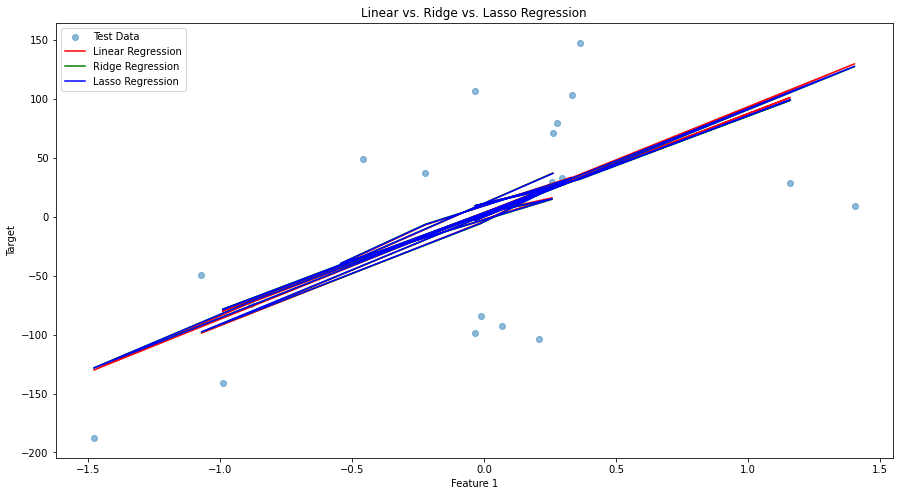

In [6]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.datasets import make_regression

# Generate synthetic data with multicollinearity
X, y = make_regression(n_samples=100, n_features=2, noise=10, random_state=42)

# Introduce multicollinearity by making the two features highly correlated
X[:, 1] = X[:, 0] * 2 + np.random.randn(100) * 5

# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(X))

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Ridge Regression
ridge_reg = Ridge(alpha=1.0)  # You can adjust the alpha parameter for strength of regularization
ridge_reg.fit(X_train, y_train)

# Lasso Regression
lasso_reg = Lasso(alpha=1.0)  # You can adjust the alpha parameter for strength of regularization
lasso_reg.fit(X_train, y_train)

# Calculate R-squared scores for each model
linear_score = linear_reg.score(X_test, y_test)
ridge_score = ridge_reg.score(X_test, y_test)
lasso_score = lasso_reg.score(X_test, y_test)

# Print R-squared scores
print("Linear Regression R-squared:", linear_score)
print("Ridge Regression R-squared:", ridge_score)
print("Lasso Regression R-squared:", lasso_score)